<img src="http://oproject.org/tiki-download_file.php?fileId=8&display&x=450&y=128">
<img src="http://gfif.udea.edu.co/root/tmva/img/tmva_logo.gif">

# Variance Threshold Transformation
<hr style="border-top-width: 4px; border-top-color: #34609b;"> 

## Introduction

In high energy physics and machine learning problems, we often encounter data which have large number of input variables. However to extract maximum information from the data, we need to select the relevant input variables for the multivariate classification and regression methods implemented in TMVA. Variance Threshold is a simple unsupervised variable selection method which automates this process. 

It computes weighted variance $\sigma^2_V$ for each variable $V$ and ignores the ones whose variance doesn't meet a specific threshold. Weighted variance for each variable is defined as follows: 
$$\sigma^2_V = \frac{\sum_{i=1}^N w_i (x_i - \mu_V)^2}{\sum_{i=1}^N w_i}$$

where $N$ is the number of events in a dataset, $x_i$ denotes the value of variable for the $i$th event, $w_i$ is the weight of each event and $\mu_V$ denotes the weighted mean of variable. 
$$\mu_V = \frac{\sum_{i=1}^N w_i x_i}{\sum_{i=1}^N w_i}$$

A threshold $T$ for variance can be set by user otherwise default value of threshold is zero i.e. remove the variables which have same value in all the events. We get a new set of variables $S$ which can be formally defined as: 

$$S = \{V  \mid \sigma^2_V > T \}$$

In [1]:
from ROOT import TCanvas, TPad, TFile, TPaveText
from ROOT import gBenchmark, gStyle, gROOT

Welcome to JupyROOT 6.07/07


## Data Generation 

In [2]:
# from ROOT import gROOT, TCanvas, TF1
# %jsroot
# gROOT.Reset()
# c1 = TCanvas( 'c1', 'Example with Formula', 200, 10, 700, 500 )
# c1.Draw()
# #
# # Create a one dimensional function and draw it
# #
# fun1 = TF1( 'fun1', 'abs(sin(x)/x)', 0, 10 )
# c1.SetGridx()
# c1.SetGridy()
# fun1.Draw()

In [1]:
import ROOT

Welcome to JupyROOT 6.07/07


In [2]:
filename = "hsimple.root"
hfile = ROOT.TFile(filename,"RECREATE","Demo ROOT file with histograms")

In [3]:
hpx = ROOT.TH1F("hpx","This is the px distribution",64,-4,4)
hpxpy = ROOT.TH2F("hpxpy","py vs px",64,-4,4,64,-4,4)
hprof = ROOT.TProfile("hprof","Profile of pz versus px",64,-4,4,0,20)
ntuple = ROOT.TNtuple("ntuple","Demo ntuple","px:py:pz:random:i")

In [4]:
c1 = ROOT.TCanvas("c1","Filling Example",800,600)

In [5]:
benchmarkName = "hsimple"
ROOT.gBenchmark.Start(benchmarkName)

r = ROOT.TRandom3()
rD = ROOT.Double
px, py, pz = rD(0.), rD(0.), rD(0.)
for i in range(50000):
    r.Rannor(px,py)
    pz = px*px + py*py
    rnd = r.Rndm()
    hpx.Fill(px)
    hpxpy.Fill(px,py)
    hprof.Fill(px,pz)
    ntuple.Fill(px,py,pz,rnd,i)

ROOT.gBenchmark.Show(benchmarkName)

hsimple   : Real Time =   0.51 seconds Cpu Time =   0.54 seconds


In [6]:
hpx.SetFillColor(0)
print "Bytes written:", hfile.Write()

Bytes written: 6973


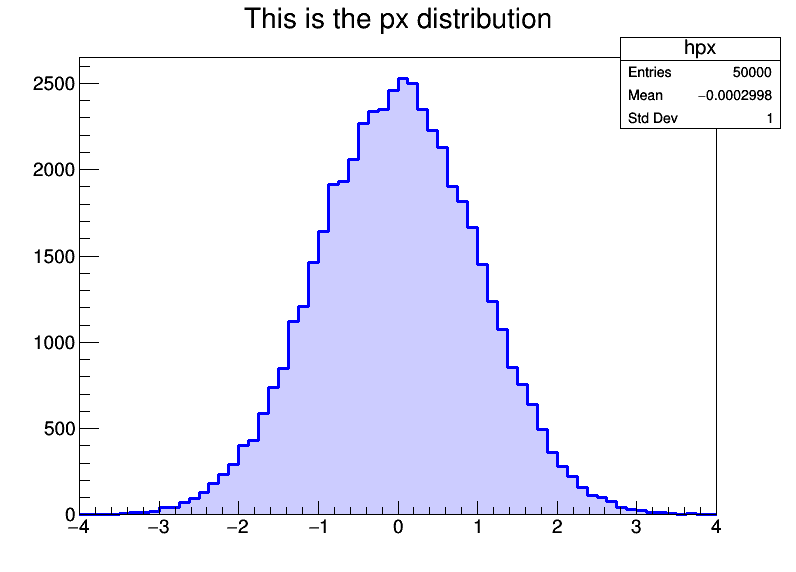

In [7]:
hpx.SetFillColor(ROOT.kBlue-10)
hpx.SetLineColor(ROOT.kBlue)
hpx.Draw()
c1.Draw()